In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf


In [6]:
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [7]:
insurance_one_hot= pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [8]:
X = insurance_one_hot.drop('charges', axis=1)
y = insurance['charges']

In [16]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [30]:
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss='mae', optimizer=tf.keras.optimizers.Adam(), metrics=['mae'])

history = insurance_model.fit(X_train, y_train, epochs=500)

Epoch 1/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13248.1416 - mae: 13248.1416
Epoch 2/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13091.5674 - mae: 13091.5674 
Epoch 3/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12773.4854 - mae: 12773.4854 
Epoch 4/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12140.8135 - mae: 12140.8135 
Epoch 5/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11053.4473 - mae: 11053.4473
Epoch 6/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9606.9424 - mae: 9606.9424 
Epoch 7/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8210.4199 - mae: 8210.4199 
Epoch 8/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7472.4688 - mae: 7472.4688
Epoch 9/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7360.2866 - mae: 7360.2866 
Epoch 10/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7334.4336 - mae: 7334.4336 
Epoch 11/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7312.5854 - mae: 7312.5854 
Epoch 12/500
34/34 ━━━━━━━━━━━━━━━

In [31]:
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3212.3042 - mae: 3212.3042  


[3162.914794921875, 3162.914794921875]

Text(0.5, 0, 'epochs')

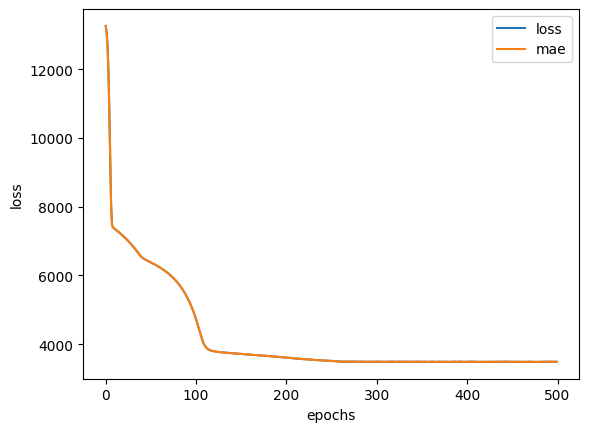

In [32]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

## SAME BUT WITH NORMALIZATION

In [34]:
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv')

insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [37]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values in between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

X = insurance.drop("charges", axis=1)
y = insurance["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [43]:
tf.random.set_seed(42)

insurance_model_normalized = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_normalized.compile(loss='mae', optimizer=tf.keras.optimizers.Adam(), metrics=['mae'])

history = insurance_model_normalized.fit(X_train_normal,  y_train, epochs=500)

Epoch 1/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13297.1875 - mae: 13297.1875
Epoch 2/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13290.3447 - mae: 13290.3447 
Epoch 3/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13273.1846 - mae: 13273.1846 
Epoch 4/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13235.9268 - mae: 13235.9268 
Epoch 5/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13167.3936 - mae: 13167.3936 
Epoch 6/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13056.3291 - mae: 13056.3291 
Epoch 7/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12892.1543 - mae: 12892.1543 
Epoch 8/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12664.7705 - mae: 12664.7705 
Epoch 9/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12364.3232 - mae: 12364.3232 
Epoch 10/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11982.6367 - mae: 11982.6367 
Epoch 11/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11526.0957 - mae: 11526.0957 
Epoch 12/500
34/34 ━

In [44]:
insurance_model_normalized.evaluate(X_test_normal, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3213.1157 - mae: 3213.1157  


[3160.06884765625, 3160.06884765625]

Text(0.5, 0, 'epochs')

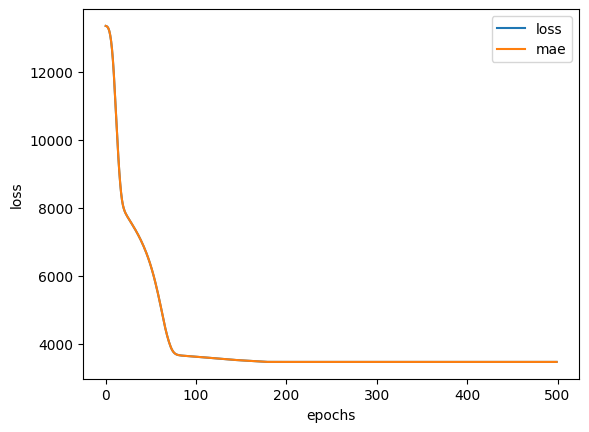

In [45]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')